In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
#importing dataset as "df"
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
df.info()
#exploring the datatype, columns, entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
print(df.shape)
#exploring the shape

(5000, 14)


In [5]:
df.describe()
#exploring the statistical summary
#Experience has a min value of "-3" (this doesn't make sense); zip code has a min of "2121.852197" (this doesn't make sense); 

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [6]:
df.isnull().sum()
#exploring the null values (confirms what I saw in df.info)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.mode().T
#The mode for "Experience" is 32 and the mode for "Zip Code" is 94720

0     1     2     3     4     5     6     7     8     \
ID                      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   
Age                    35.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Experience             32.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Income                 44.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
ZIP Code            94720.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Family                  1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
CCAvg                   0.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Education               1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Mortgage                0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Personal Loan           0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Securities Account      0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
CD Account              0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Online                  1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
CreditCard              0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                    9     ...    4990    4991    4992    4993    4994    4995  \
ID                  10.0  ...  4991.0  4992.0  4993.0  4994.0  4995.0  4996.0   
Age                  NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Experience           NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Income               NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
ZIP Code             NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Family               NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
CCAvg                NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Education            NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Mortgage             NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Personal Loan        NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Securities Account   NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
CD Account           NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
Online               NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
CreditCard           NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

                      4996    4997    4998    4999  
ID                  4997.0  4998.0  4999.0  5000.0  
Age                    NaN     NaN     NaN     NaN  
Experience             NaN     NaN     NaN     NaN  
Income                 NaN     NaN     NaN     NaN  
ZIP Code               NaN     NaN     NaN     NaN  
Family                 NaN     NaN     NaN     NaN  
CCAvg                  NaN     NaN     NaN     NaN  
Education              NaN     NaN     NaN     NaN  
Mortgage               NaN     NaN     NaN     NaN  
Personal Loan          NaN     NaN     NaN     NaN  
Securities Account     NaN     NaN     NaN     NaN  
CD Account             NaN     NaN     NaN     NaN  
Online                 NaN     NaN     NaN     NaN  
CreditCard             NaN     NaN     NaN     NaN  

[14 rows x 5000 columns]

In [8]:
dupes = df.duplicated()
sum(dupes)
#no duplicates in the data

0

In [9]:
df['ZIP Code'] = df['ZIP Code'].replace([9307], 94720)
#replacing the incorrect zip code with the mode zip code since this is more likely.

In [10]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.585600   
std    1443.520003    11.463166    11.467954    46.033729   1759.591273   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [11]:
df['Experience'] = df['Experience'].replace([-3],32)
df['Experience'] = df['Experience'].replace([-2],32)
df['Experience'] = df['Experience'].replace([-1],32)
#replaced all of the Experience years that were negative to the mode of 32 since this is more realistic.

In [12]:
df.describe()
#shows there are no invalid Zip code and not invalid experience values listed as min values.

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.452400    73.774200  93169.585600   
std    1443.520003    11.463166    11.315093    46.033729   1759.591273   
min       1.000000    23.000000     0.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    11.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    21.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [13]:
df.nunique()
#Number of unique in each column

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               466
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [14]:
df.groupby('Mortgage').apply(lambda column: (column == 0).sum())
#shows there are 3462 people with zero mortages.

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
Mortgage                                                                    
0          0    0          51       0         0       0     77          0   
75         0    0           0       0         0       0      0          0   
76         0    0           0       0         0       0      1          0   
77         0    0           0       0         0       0      0          0   
78         0    0           1       0         0       0      1          0   
...       ..  ...         ...     ...       ...     ...    ...        ...   
590        0    0           0       0         0       0      0          0   
601        0    0           0       0         0       0      0          0   
612        0    0           0       0         0       0      0          0   
617        0    0           0       0         0       0      0          0   
635        0    0           0       0         0       0      0          0   

          Mortgage  Personal Loan  Securities Account  CD Account  Online  \
Mortgage                                                                    
0             3462           3150                3099        3275    1391   
75               0              7                   7           8       0   
76               0             11                   9          10       4   
77               0              4                   4           4       1   
78               0             15                  10          15       5   
...            ...            ...                 ...         ...     ...   
590              0              0                   1           1       1   
601              0              1                   1           1       0   
612              0              0                   1           1       0   
617              0              0                   1           1       1   
635              0              1                   1           1       0   

          CreditCard  
Mortgage              
0               2439  
75                 8  
76                 6  
77                 3  
78                15  
...              ...  
590                1  
601                1  
612                1  
617                1  
635                1  

[347 rows x 14 columns]

In [15]:
df.groupby('CCAvg').apply(lambda column: (column == 0).sum())
#shows there are 106 people with no credit card spending per month.

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
CCAvg                                                                    
0.0     0    0           0       0         0       0    106          0   
0.1     0    0           5       0         0       0      0          0   
0.2     0    0           2       0         0       0      0          0   
0.3     0    0           2       0         0       0      0          0   
0.4     0    0           2       0         0       0      0          0   
...    ..  ...         ...     ...       ...     ...    ...        ...   
8.8     0    0           0       0         0       0      0          0   
8.9     0    0           0       0         0       0      0          0   
9.0     0    0           0       0         0       0      0          0   
9.3     0    0           0       0         0       0      0          0   
10.0    0    0           0       0         0       0      0          0   

       Mortgage  Personal Loan  Securities Account  CD Account  Online  \
CCAvg                                                                    
0.0          77            105                  95         104      41   
0.1         125            181                 165         172      75   
0.2         146            196                 180         194      81   
0.3         168            235                 215         226      94   
0.4         115            175                 163         173      76   
...         ...            ...                 ...         ...     ...   
8.8           6              8                   8           9       2   
8.9           1              0                   1           1       1   
9.0           1              0                   2           2       1   
9.3           1              0                   1           1       1   
10.0          3              0                   3           3       3   

       CreditCard  
CCAvg              
0.0            78  
0.1           129  
0.2           139  
0.3           172  
0.4           130  
...           ...  
8.8             7  
8.9             1  
9.0             2  
9.3             1  
10.0            2  

[108 rows x 14 columns]

In [16]:
df['ZIP Code'].value_counts()
#value counts on Zip Code

94720    170
94305    127
95616    116
90095     71
93106     57
        ... 
90813      1
92694      1
94598      1
94965      1
94087      1
Name: ZIP Code, Length: 466, dtype: int64

In [17]:
df['Education'].value_counts()
#value counts on Education

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [18]:
df['Personal Loan'].value_counts()
#value counts on Personal Loan

0    4520
1     480
Name: Personal Loan, dtype: int64

In [19]:
df['Securities Account'].value_counts()
#value counts on Securities Account

0    4478
1     522
Name: Securities Account, dtype: int64

In [20]:
df['CD Account'].value_counts()
#value counts on CD Account

0    4698
1     302
Name: CD Account, dtype: int64

In [21]:
df['Online'].value_counts()
#value counts on Online

1    2984
0    2016
Name: Online, dtype: int64

In [22]:
df['CreditCard'].value_counts()
#value counts on CreditCard

0    3530
1    1470
Name: CreditCard, dtype: int64

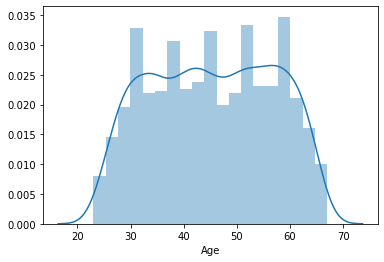

In [23]:
sns.distplot(df['Age']);
#univariate plot

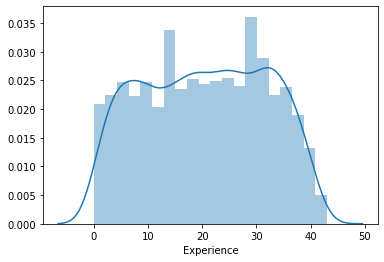

In [24]:
sns.distplot(df['Experience']);
#univariate plot

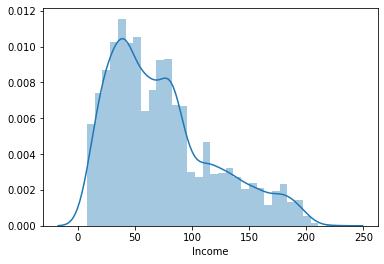

In [25]:
sns.distplot(df['Income']);
#univariate plot

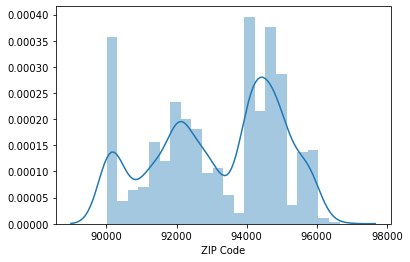

In [26]:
sns.distplot(df['ZIP Code']);
#univariate plot

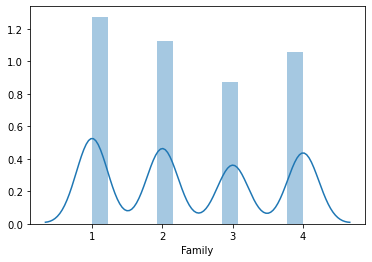

In [27]:
sns.distplot(df['Family']);
#univariate plot

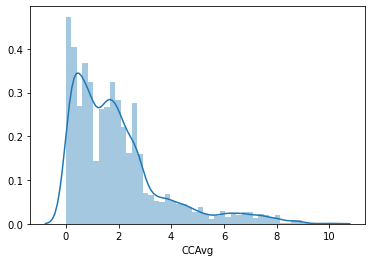

In [28]:
sns.distplot(df['CCAvg']);
#univariate plot

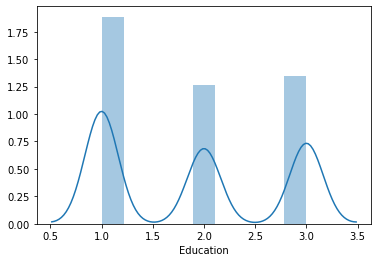

In [29]:
sns.distplot(df['Education']);
#univariate plot

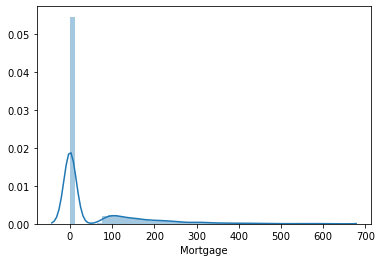

In [30]:
sns.distplot(df['Mortgage']);
#univariate plot

C:\Users\lries\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


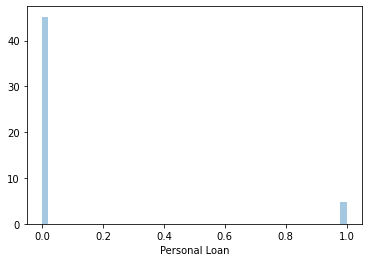

In [31]:
sns.distplot(df['Personal Loan']);
#univariate plot

C:\Users\lries\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


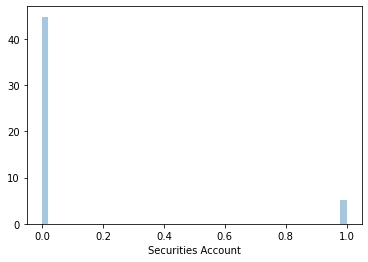

In [32]:
sns.distplot(df['Securities Account']);
#univariate plot

In [33]:
sns.distplot(df['CD Account']);
#univariate plot

C:\Users\lries\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


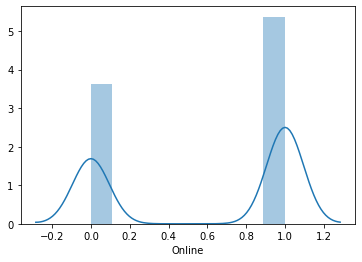

In [34]:
sns.distplot(df['Online']);
#univariate plot

In [35]:
sns.distplot(df['CreditCard']);
#univariate plot

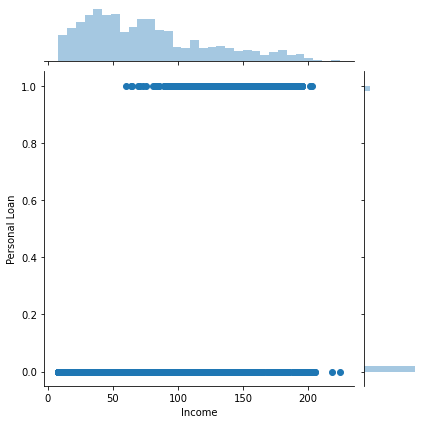

In [36]:
sns.jointplot(df['Income'], df['Personal Loan'])
#bivariate plot

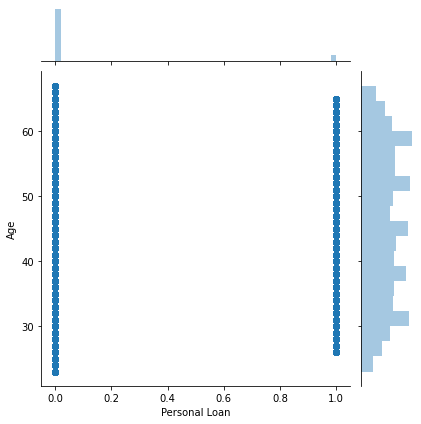

In [37]:
sns.jointplot(df['Personal Loan'], df['Age'])
#bivariate plot

In [38]:
sns.pairplot(df,diag_kind='kde')
#ran pairplot

C:\Users\lries\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\lries\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\lries\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


In [39]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas_profiling
pandas_profiling.ProfileReport(df)
#pandas profling to visualize the data. Reviewed Pearson's r correleation on the Correlations tab

In [41]:
df2 = df.drop(['ID'], axis = 1)
#removing extra column to make it easier to work with

In [42]:
from sklearn.model_selection import train_test_split

X = df2.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df2['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# Splitting the data into training and test sets in the ration 70:30.

x_train.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
1334   47          22      35     94304       2    1.3          1         0   
4768   38          14      39     93118       1    2.0          2         0   
65     59          35     131     91360       1    3.8          1         0   
177    29           3      65     94132       4    1.8          2       244   
4489   39          13      21     95518       3    0.2          2         0   

      Securities Account  CD Account  Online  CreditCard  
1334                   0           0       1           0  
4768                   0           0       1           0  
65                     0           0       1           1  
177                    0           0       0           0  
4489                   0           0       1           0

In [43]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df2.index)) * 100))
#checking to see if the data is split

70.00% data is in training set
30.00% data is in test set


In [44]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


#print the coefficients of all attributes
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0  0.002095 -0.006753  0.03608 -0.000066  0.014683  0.009088  0.015869   

          7         8         9        10       11  intercept  
0  0.000828  0.000511  0.004483 -0.000127 -0.00002  -0.000061  


In [45]:
model_score = model.score(x_test, y_test)
print(model_score)
#shows a high score

0.908


In [46]:
#Precision Score = TP / (FP + TP)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test,y_predict))

Precision: 0.571


In [47]:
#Recall Score = TP / (FN + TP)
print('Recall: %.3f' % recall_score(y_test, y_predict))

Recall: 0.295


In [48]:
#Accuracy Score = (TP + TN) / (TP + FN + TN + FP)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))

Accuracy: 0.908


In [49]:
#F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)
print('F1 Score: %.3f' % f1_score(y_test, y_predict))

F1 Score: 0.389


In [50]:
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)
#ROC AUC Score

0.75

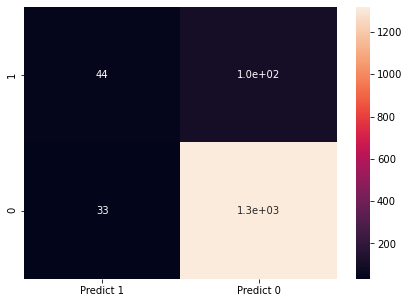

In [51]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
#confusion matrix showing True Positive = 44, False Postive = 33, True Negative = 1.3e+03, and False Neg = 1.0e+02.

In [52]:
p=x_test.copy()
p['Observed Personal Loan Status']=y_test
p['Predicted Personal Loan Status']=y_predict
#added columns for Observed personal loan status and Predicted personal loan status

In [53]:
p.loc[p['Observed Personal Loan Status'] != p['Predicted Personal Loan Status']]
#presents the rows where the predicted personal loan status does not match the observed personal loan status
#138 rows where the predicted does not equal the observed out of 5000 rows seems like a good model.

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
1513   45          21     183     95211       2    1.4          1       354   
4377   33           8     145     92507       1    2.7          3         0   
3988   59          35      85     91330       1    3.4          3         0   
3271   52          27      93     90291       4    4.1          2         0   
349    26           2      60     93407       2    3.0          1       132   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4563   28           2     188     92350       2    4.5          1         0   
351    28           4     155     92182       4    5.3          2         0   
421    28           3     115     92333       4    3.1          2         0   
4008   61          31     154     94555       3    7.5          3       351   
3651   49          23     140     90504       1    1.9          3         0   

      Securities Account  CD Account  Online  CreditCard  \
1513                   0           0       0           0   
4377                   0           0       1           0   
3988                   0           1       0           1   
3271                   0           0       0           1   
349                    0           0       0           0   
...                  ...         ...     ...         ...   
4563                   1           0       1           0   
351                    0           0       1           0   
421                    0           0       0           0   
4008                   0           1       1           1   
3651                   0           0       0           1   

      Observed Personal Loan Status  Predicted Personal Loan Status  
1513                              0                               1  
4377                              1                               0  
3988                              1                               0  
3271                              1                               0  
349                               1                               0  
...                             ...                             ...  
4563                              0                               1  
351                               1                               0  
421                               1                               0  
4008                              1                               0  
3651                              1                               0  

[138 rows x 14 columns]

In [54]:
#Conclusion it appears that there is some coorelation between the Personal Loan and having money in a CD account. Additional correlations exist between the Personal Loan and Income and CCAvg. 
#A targeted campaign for customers with a CD Account and higher income/CCAvg may be worthwhile.